In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use("dark_background")

In [294]:
def gaussian(x, mu=0, sigma=1):
    return (1/(np.sqrt(2*np.pi)*sigma)) * (np.exp((-(x-mu)**2) / (2*sigma**2)))


def generate_gaussian(step, sample_size:int=10_000, x0=0, mu=0, sigma=1):
    """
    Generates Gaussian random numbers using the uniform random number generator,
    based on the Metropolis Algorithm.

    step: Metropolis step size

    sample_size: We want this many samples drawn from the Gaussian distribution.

    x0: initial position
    """


    x = x0
    # Random numbers for Gaussian distribution will be stored in this array:
    gaussian_xs = np.zeros(sample_size)
    # Wait for this many steps to counter the effect of correlation:
    n = 100
    all_xs = np.zeros(n*sample_size)
    # This will be used to calculate acceptance rate later on:
    acceptance_counter = 0
    for i in range(n*sample_size):
        # The exact algorithm explained in the textbook is implemented:
        y = x + step * np.random.uniform(-1,1)
        if np.random.uniform(0,1) < (gaussian(y, mu=mu, sigma=sigma) / gaussian(x, mu=mu, sigma=sigma)):
            x = y
            acceptance_counter += 1
        all_xs[i] = x
        # After n steps, the x obtained is stored and reported as a random number from a Gaussian distribution:
        if (i+1)%n==0:
            gaussian_xs[((i+1)//n)-1] = x
    acceptance_rate = acceptance_counter / (n*sample_size)
    return gaussian_xs, all_xs, acceptance_rate


# This function finds optimum Metropolis step sizes (Delta):
def find_step_size(a_r, step_sizes, sample_size, rtol):
    """
    Checks different Metroplois step sizes
    and returns the one that is close enough to the given acceptance rate.
    
    a_r: the desired acceptance rate

    step_sizes: The function will try to find the best step size for the given a_r in this given interval.

    sample_size: sample size to be drawn from Standard Gaussian distribution

    rtol: relative tolerance
    """


    for step in step_sizes:
        gaussian_xs, all_xs, acceptance_rate = generate_gaussian(step=step, sample_size=sample_size, x0=0)
        if np.isclose(acceptance_rate, a_r, rtol=rtol):
            return step
    # if no optimum value is found:
    return -1


# This is the C(j) function as defined by equation 8.5 of the textbook:
def auto_correlation(xs):
    # 100 is an acceptable upper bound for Xi for a sample size of 10_000 random Gaussian numbers:
    C_j = np.zeros(100)
    for j in range(1, 100):
        C_j[j] = ((np.dot(xs[:-j], xs[j:]) / len(xs[j:])) - np.mean(xs[:-j]) * np.mean(xs[j:])) / np.var(xs[:-j])
    Xi = np.argwhere(C_j <= np.exp(-1))[1][0]
    return Xi, C_j

$\Large Finding \ Optimum \ \Delta 's \ for \ a_r \in {\{0.1, 0.2, 0.3, ..., 0.9\}}$

$\Large a_r = 0.1$

In [159]:
a_r = 0.1
step_sizes = np.arange(15.9, 16, 0.01)  # interval found from trial and error
sample_size = 10_000
rtol = 0.001
# Takes at most 80 seconds to execute.
step_01 = find_step_size(a_r=a_r, step_sizes=step_sizes, sample_size=sample_size, rtol=rtol)
step_01

15.95

$\Large a_r = 0.2$

In [168]:
a_r = 0.2
step_sizes = np.arange(7.9, 8, 0.01)  # interval found from trial and error
sample_size = 10_000
rtol = 0.001
# Takes at most 80 seconds to execute.
step_02 = find_step_size(a_r=a_r, step_sizes=step_sizes, sample_size=sample_size, rtol=rtol)
step_02

7.959999999999999

$\Large a_r = 0.3$

In [243]:
a_r = 0.3
step_sizes = np.arange(5.25, 5.35, 0.01)  # interval found from trial and error
sample_size = 10_000
rtol = 0.001
# Takes at most 80 seconds to execute.
step_03 = find_step_size(a_r=a_r, step_sizes=step_sizes, sample_size=sample_size, rtol=rtol)
step_03

5.309999999999999

$\Large a_r = 0.4$

In [252]:
a_r = 0.4
step_sizes = np.arange(3.85, 3.95, 0.01)  # interval found from trial and error
sample_size = 10_000
rtol = 0.001
# Takes at most 80 seconds to execute.
step_04 = find_step_size(a_r=a_r, step_sizes=step_sizes, sample_size=sample_size, rtol=rtol)
step_04

3.8799999999999994

$\Large a_r = 0.5$

In [210]:
a_r = 0.5
step_sizes = np.arange(2.9, 3, 0.01)  # interval found from trial and error
sample_size = 10_000
rtol = 0.001
# Takes at most 80 seconds to execute.
step_05 = find_step_size(a_r=a_r, step_sizes=step_sizes, sample_size=sample_size, rtol=rtol)
step_05

2.939999999999999

$\Large a_r = 0.6$

In [211]:
a_r = 0.6
step_sizes = np.arange(2.1, 2.25, 0.01)  # interval found from trial and error
sample_size = 10_000
rtol = 0.001
# Takes at most 80 seconds to execute.
step_06 = find_step_size(a_r=a_r, step_sizes=step_sizes, sample_size=sample_size, rtol=rtol)
step_06

2.199999999999998

$\Large a_r = 0.7$

In [212]:
a_r = 0.7
step_sizes = np.arange(1.5, 1.6, 0.01)  # interval found from trial and error
sample_size = 10_000
rtol = 0.001
# Takes at most 80 seconds to execute.
step_07 = find_step_size(a_r=a_r, step_sizes=step_sizes, sample_size=sample_size, rtol=rtol)
step_07

1.58

$\Large a_r = 0.8$

In [267]:
a_r = 0.8
step_sizes = np.arange(0.95, 1.1, 0.01)  # interval found from trial and error
sample_size = 10_000
rtol = 0.001
# Takes at most 130 seconds to execute.
step_08 = find_step_size(a_r=a_r, step_sizes=step_sizes, sample_size=sample_size, rtol=rtol)
step_08

1.02

$\Large a_r = 0.9$

In [214]:
a_r = 0.9
step_sizes = np.arange(0.4, 0.55, 0.01)  # interval found from trial and error
sample_size = 10_000
rtol = 0.001
# Takes at most 130 seconds to execute.
step_09 = find_step_size(a_r=a_r, step_sizes=step_sizes, sample_size=sample_size, rtol=rtol)
step_09

0.5000000000000001

$\Large Generating \ and \ Plotting \ All \ the \ Data$

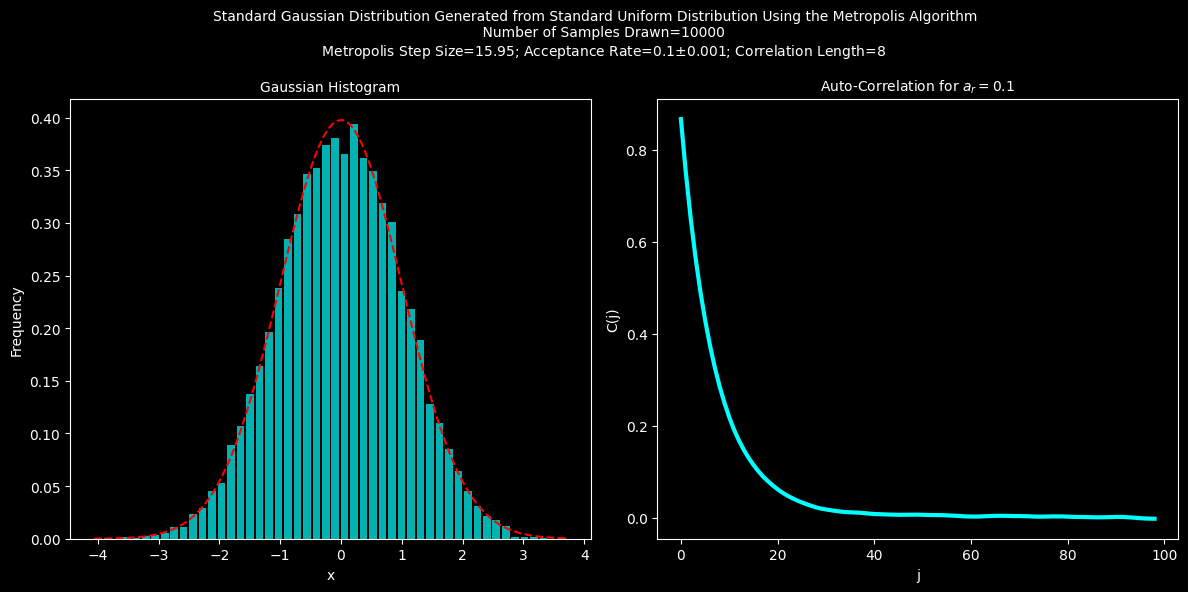

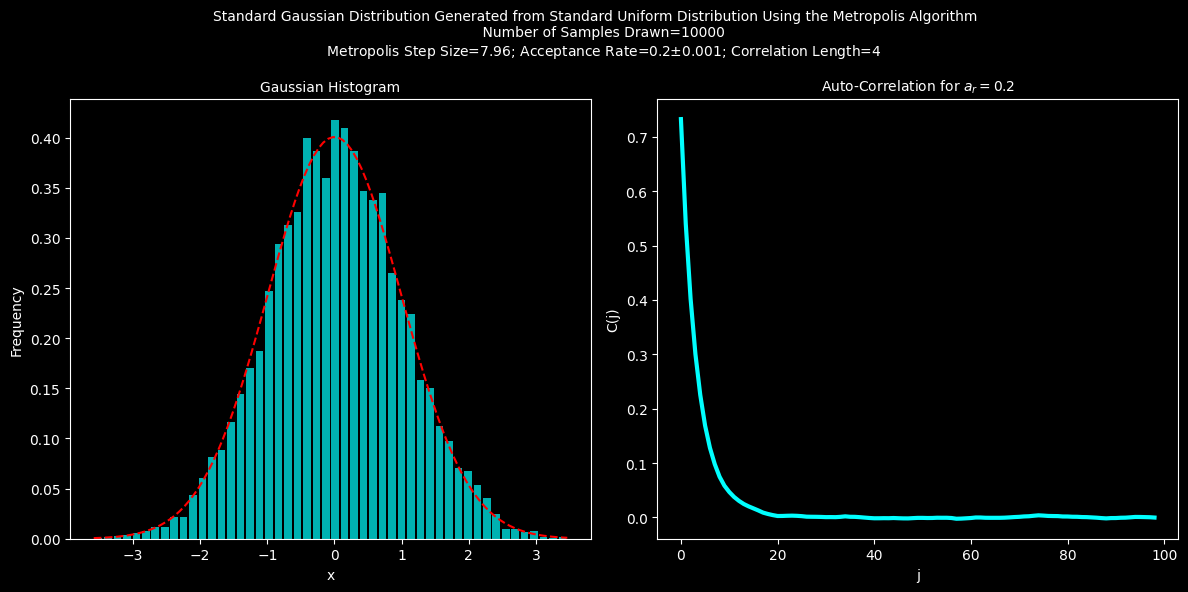

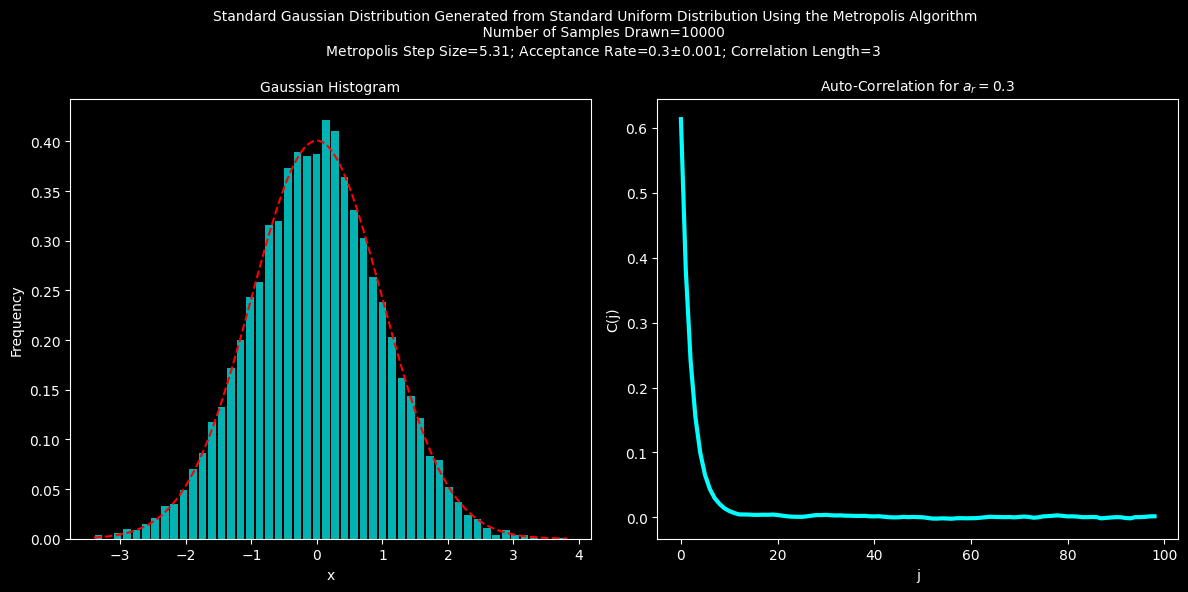

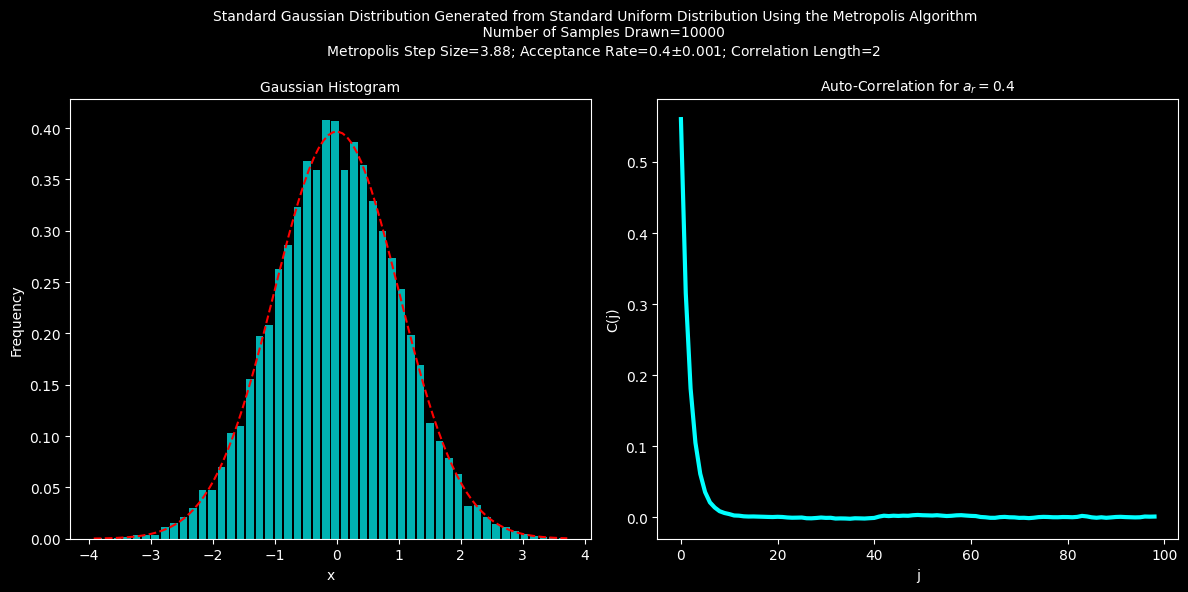

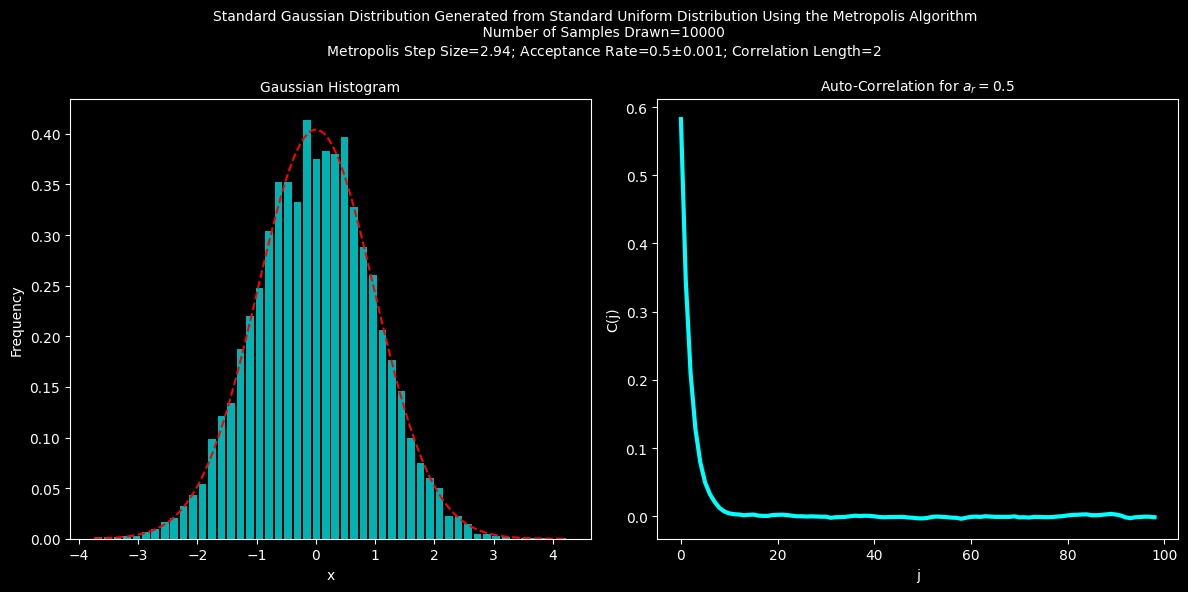

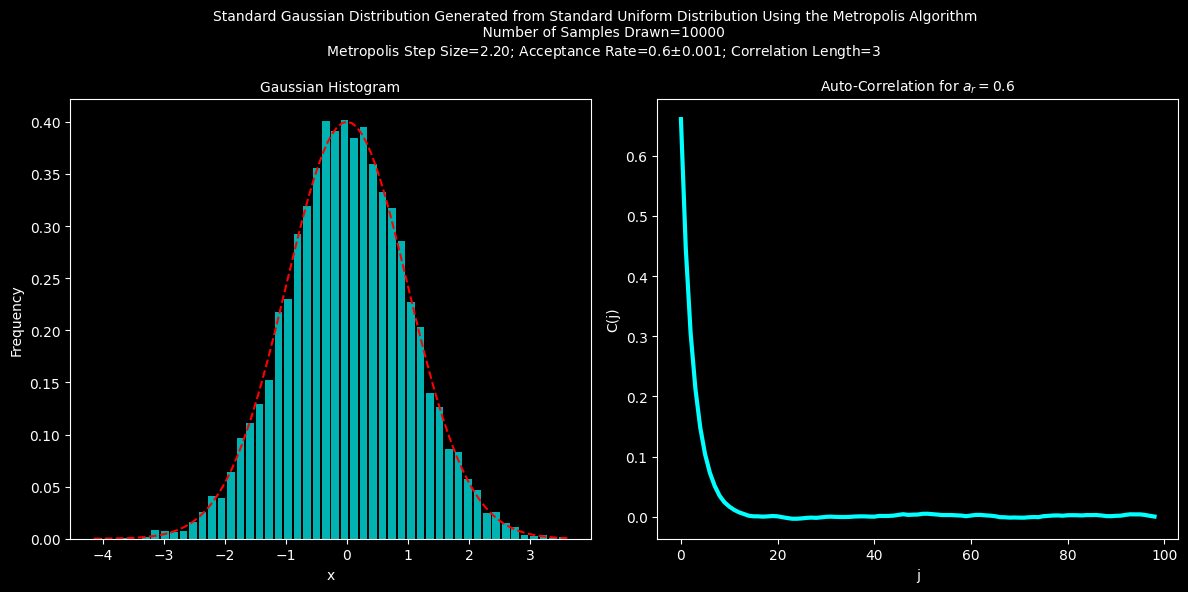

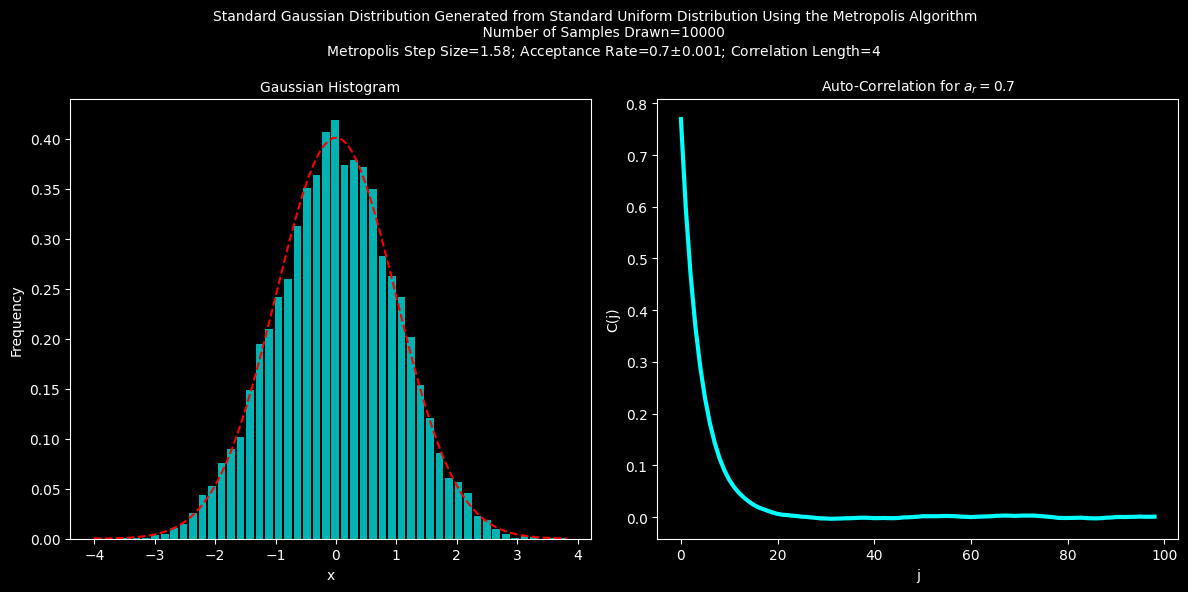

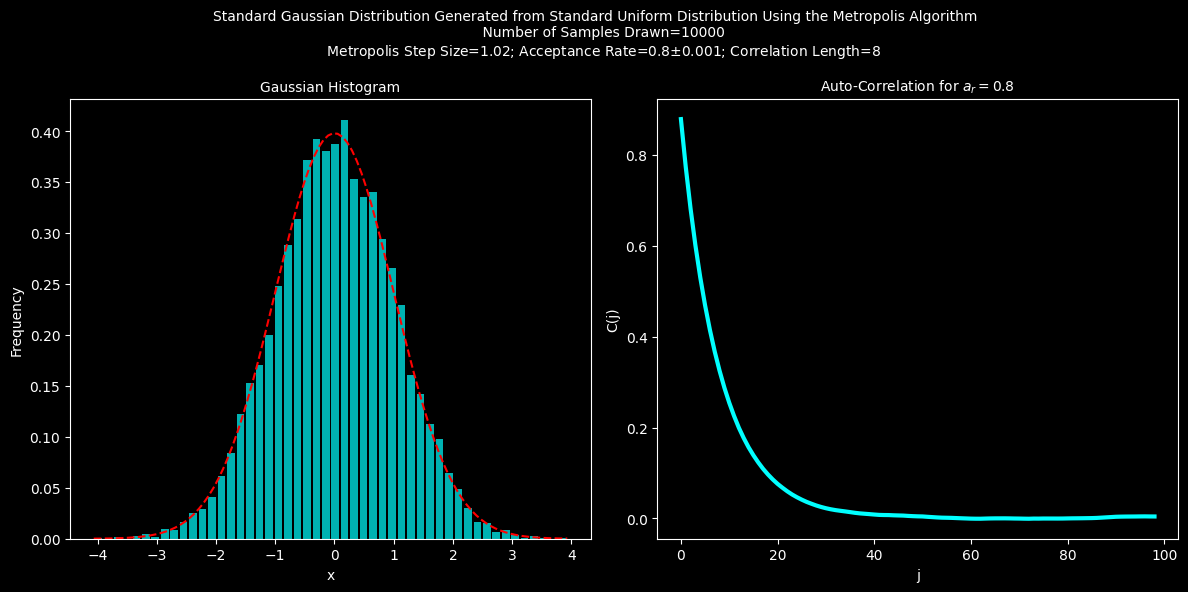

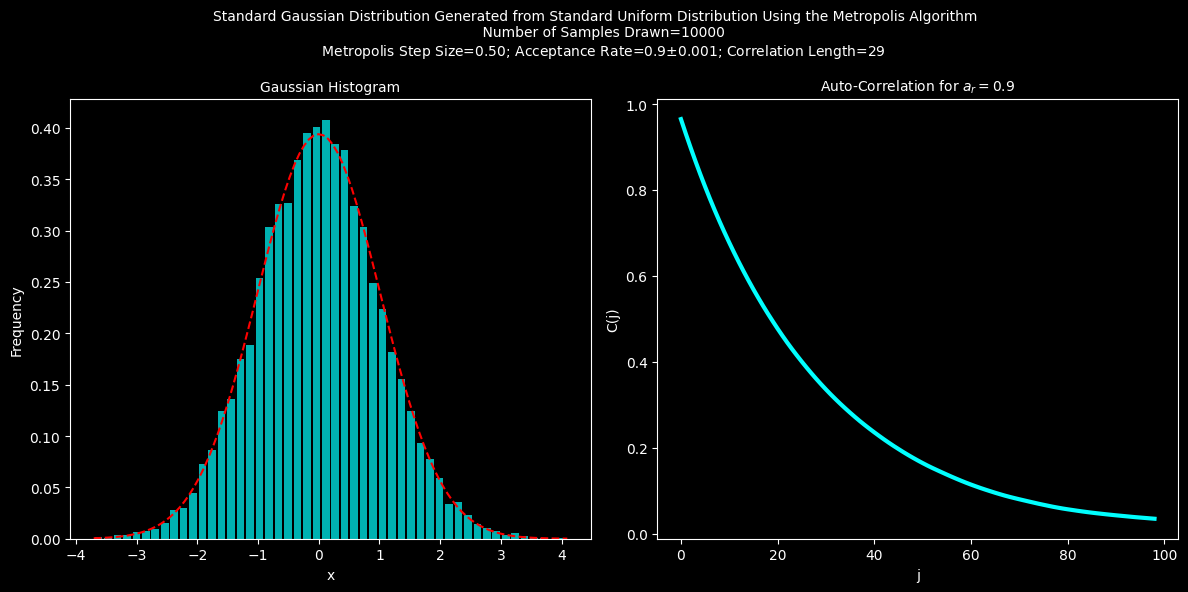

In [320]:
# This cell takes 1.5 minutes to execute.
# Uncomment the last line.
Metropolis_steps = [step_01, step_02, step_03, step_04, step_05, step_06, step_07, step_08, step_09]
# Metroplois initial position:
x0 = 0
# Gaussian Distribution parameters:
sample_size = 10_000
mu = 0
sigma = 1
for i in range(len(Metropolis_steps)):
    fig, ax = plt.subplots(1, 2, figsize=(12,6))

    gaussian_xs, all_xs, acceptance_rate = generate_gaussian(step=Metropolis_steps[i], sample_size=sample_size, x0=x0, mu=mu, sigma=sigma)
    cor = auto_correlation(all_xs)

    fig.suptitle(f"Standard Gaussian Distribution Generated from Standard Uniform Distribution Using the Metropolis Algorithm\n\
    Number of Samples Drawn={sample_size}\n\
    Metropolis Step Size={Metropolis_steps[i]:.2f}; Acceptance Rate={acceptance_rate:.1f}$\pm$0.001; Correlation Length={cor[0]}",
    fontsize=10)
    ax.ravel()[0].hist(gaussian_xs, rwidth=0.8, bins=50, density=True, color="aqua", alpha=0.7)
    ax.ravel()[0].set_title("Gaussian Histogram", fontsize=10)
    ax.ravel()[0].set_xlabel("x")
    ax.ravel()[0].set_ylabel("Frequency")

    x = np.linspace(gaussian_xs.min(), gaussian_xs.max(), 100)
    ax.ravel()[0].plot(x, stats.norm.pdf(x, 0, np.std(gaussian_xs)), "r--")

    ax.ravel()[1].plot(cor[1][1:], color="aqua", linewidth=3)
    ax.ravel()[1].set_title(f"Auto-Correlation for $a_r={acceptance_rate:.1f}$", fontsize=10)
    ax.ravel()[1].set_xlabel("j")
    ax.ravel()[1].set_ylabel("C(j)")

    fig.tight_layout()  # So the suptitle shows in the saved figures.
    # fig.savefig(f"Exercise8_1_{i}.jpg");